# Exercise II
Using the dataset FuelConsumptionCo2.csv:
 - Perform an EDA (Exploratory Data Analysis) on the data.
 - Create some new columns you think might be interesting.
 - Split the data into features and target (CO2EMISSIONS).
 - Split the data into training and testing sets

Preprocess the data:
 - Handle NaNs.
 - Handle outliers.
 - Encode categorical variables.
 - Apply any transformations you consider useful.
 - Scale the data

In a for loop, train several regression models and select the best one.

Validate the metrics of the best model using Hold Out and K-Fold techniques.

In [320]:
# Análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Encoding
from sklearn.preprocessing import LabelEncoder

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Train test split
from sklearn.model_selection import train_test_split

# Métrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Validation
from sklearn.base import clone
from sklearn.model_selection import KFold

# 
from sklearn.preprocessing import MinMaxScaler

#Guardar modelo
import pickle

In [630]:
#Load data set

df = pd.read_csv(r"C:\Users\User\OneDrive - Universidade de Santiago de Compostela\Documentos\Data Science\Data Science & IA Bootcamp 2024\train_test\data\fuel_consumption_co2_train.csv")
df

,Model Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Fuel Consumption Comb (mpg),CO2 Emissions
0,1999,TOYOTA,TERCEL,SUBCOMPACT,1.5,4.0,A4,Reg. Gasoline,9.3,7.0,8.2,34.0,189
1,2015,CHEVROLET,TAHOE,SUV - STANDARD,5.3,8.0,A6,Ethanol (E85),20.2,13.6,17.2,16.0,275
2,1997,BMW,318ti,COMPACT,1.9,4.0,M5,Prm. Gasoline,11.6,8.0,10.0,28.0,230
3,2016,MERCEDES-BENZ,E 400 CABRIOLET,SUBCOMPACT,3.0,6.0,AS7,Prm. Gasoline,11.5,8.1,10.0,28.0,233
4,2018,Mitsubishi,Mirage G4,Compact,1.2,3.0,AV,Reg. Gasoline,6.9,5.7,6.4,44.0,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21593,2018,Ford,Shelby GT350 Mustang,Subcompact,5.2,8.0,M6,Prm. Gasoline,17.2,11.3,14.6,19.0,341
21594,2002,PONTIAC,FIREBIRD,SUBCOMPACT,3.8,6.0,M5,Reg. Gasoline,13.8,8.2,11.3,25.0,260
21595,1996,BENTLEY,TURBO R,MID-SIZE,6.7,8.0,A4,Prm. Gasoline,23.2,15.9,19.9,14.0,458
21596,2013,BMW,335is COUPE,SUBCOMPACT,3.0,6.0,M6,Prm. Gasoline,13.1,8.9,11.2,25.0,258


## EDA

- Check distributions, counts, correlations.
- Detect missing values and outliers.
- Explore categorical imbalance (like Fuel Type).

In [404]:
df.describe()

,Model Year,Engine Size,Cylinders,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Fuel Consumption Comb (mpg),CO2 Emissions
count,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000
mean,2010.004630,3.349477,5.836559,13.849403,10.017043,12.125053,24.914205,275.610288
std,7.941116,1.341992,1.799701,3.742281,2.593759,3.188381,6.713637,65.773337
min,1995.000000,0.800000,2.000000,4.000000,3.900000,4.000000,10.000000,94.000000
25%,2004.000000,2.300000,4.000000,11.300000,8.200000,9.900000,20.000000,230.000000
50%,2010.000000,3.000000,6.000000,13.400000,9.500000,11.700000,24.000000,269.000000
75%,2017.000000,4.200000,8.000000,15.900000,11.400000,13.900000,29.000000,315.000000
max,2023.000000,8.400000,16.000000,33.300000,22.100000,27.500000,71.000000,633.000000


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21598 entries, 0 to 21597
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Model Year                   21598 non-null  int64  
 1   Make                         21598 non-null  object 
 2   Model                        21598 non-null  object 
 3   Vehicle Class                21598 non-null  object 
 4   Engine Size                  21598 non-null  float64
 5   Cylinders                    21598 non-null  float64
 6   Transmission                 21598 non-null  object 
 7   Fuel Type                    21598 non-null  object 
 8   Fuel Consumption City        21598 non-null  float64
 9   Fuel Consumption Hwy         21598 non-null  float64
 10  Fuel Consumption Comb        21598 non-null  float64
 11  Fuel Consumption Comb (mpg)  21598 non-null  float64
 12  CO2 Emissions                21598 non-null  int64  
dtypes: float64(6), i

In [148]:
df["Make"].str.lower().value_counts()

Make
chevrolet        2045
ford             1775
bmw              1337
gmc              1325
mercedes-benz    1120
dodge            1000
toyota            973
porsche           799
volkswagen        742
audi              730
nissan            727
mazda             609
honda             536
hyundai           529
jeep              514
volvo             479
subaru            467
kia               437
chrysler          416
lexus             398
cadillac          389
mini              351
jaguar            339
pontiac           318
mitsubishi        276
buick             267
infiniti          248
acura             240
suzuki            209
saab              201
lincoln           186
land rover        181
saturn            168
bentley           130
ram               122
maserati          116
aston martin       98
rolls-royce        96
lamborghini        96
fiat               75
plymouth           74
ferrari            71
oldsmobile         65
mercury            47
alfa romeo         40
isuzu

In [109]:
df["Vehicle Class"].sort_values().value_counts().to_dict()

{'COMPACT': 2568,
 'SUV': 2413,
 'MID-SIZE': 2196,
 'PICKUP TRUCK - STANDARD': 1813,
 'SUBCOMPACT': 1652,
 'FULL-SIZE': 999,
 'SUV: Small': 911,
 'TWO-SEATER': 891,
 'MINICOMPACT': 689,
 'SUV - SMALL': 665,
 'STATION WAGON - SMALL': 663,
 'SUV: Standard': 626,
 'Mid-size': 605,
 'Pickup truck: Standard': 483,
 'MINIVAN': 452,
 'Compact': 443,
 'SUV - STANDARD': 422,
 'Subcompact': 409,
 'VAN - CARGO': 391,
 'PICKUP TRUCK - SMALL': 388,
 'STATION WAGON - MID-SIZE': 375,
 'Full-size': 373,
 'VAN - PASSENGER': 308,
 'Two-seater': 281,
 'Minicompact': 177,
 'Station wagon: Small': 121,
 'Pickup truck: Small': 96,
 'Special purpose vehicle': 57,
 'Station wagon: Mid-size': 41,
 'Minivan': 39,
 'SPECIAL PURPOSE VEHICLE': 39,
 'Van: Passenger': 11,
 'UL': 1}

In [592]:
df["Transmission"].sort_values().value_counts().to_dict()

{'A4': 4421,
 'M5': 2564,
 'AS6': 2264,
 'M6': 2207,
 'A6': 1586,
 'AS8': 1582,
 'A5': 1296,
 'A8': 712,
 'AS5': 692,
 'AV': 682,
 'AM7': 588,
 'AS7': 500,
 'A9': 475,
 'AS10': 361,
 'A7': 223,
 'AS4': 206,
 'A10': 182,
 'AM6': 180,
 'AM8': 152,
 'A3': 147,
 'AV7': 125,
 'AV6': 116,
 'AS9': 110,
 'M7': 99,
 'AV8': 84,
 'AV10': 21,
 'AV1': 11,
 'AM5': 5,
 'AM9': 4,
 'M4': 3}

In [111]:
df["Fuel Type"].value_counts()

Fuel Type
Reg. Gasoline    11918
Prm. Gasoline     8376
Ethanol (E85)      886
Diesel             388
Natural Gas         30
Name: count, dtype: int64

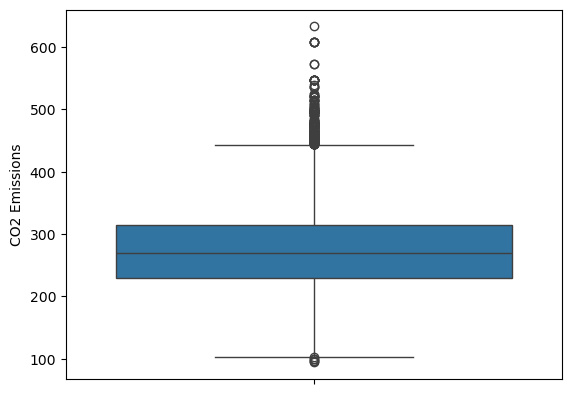

In [115]:
sns.boxplot(data = df, 
            y = "CO2 Emissions")

plt.show()

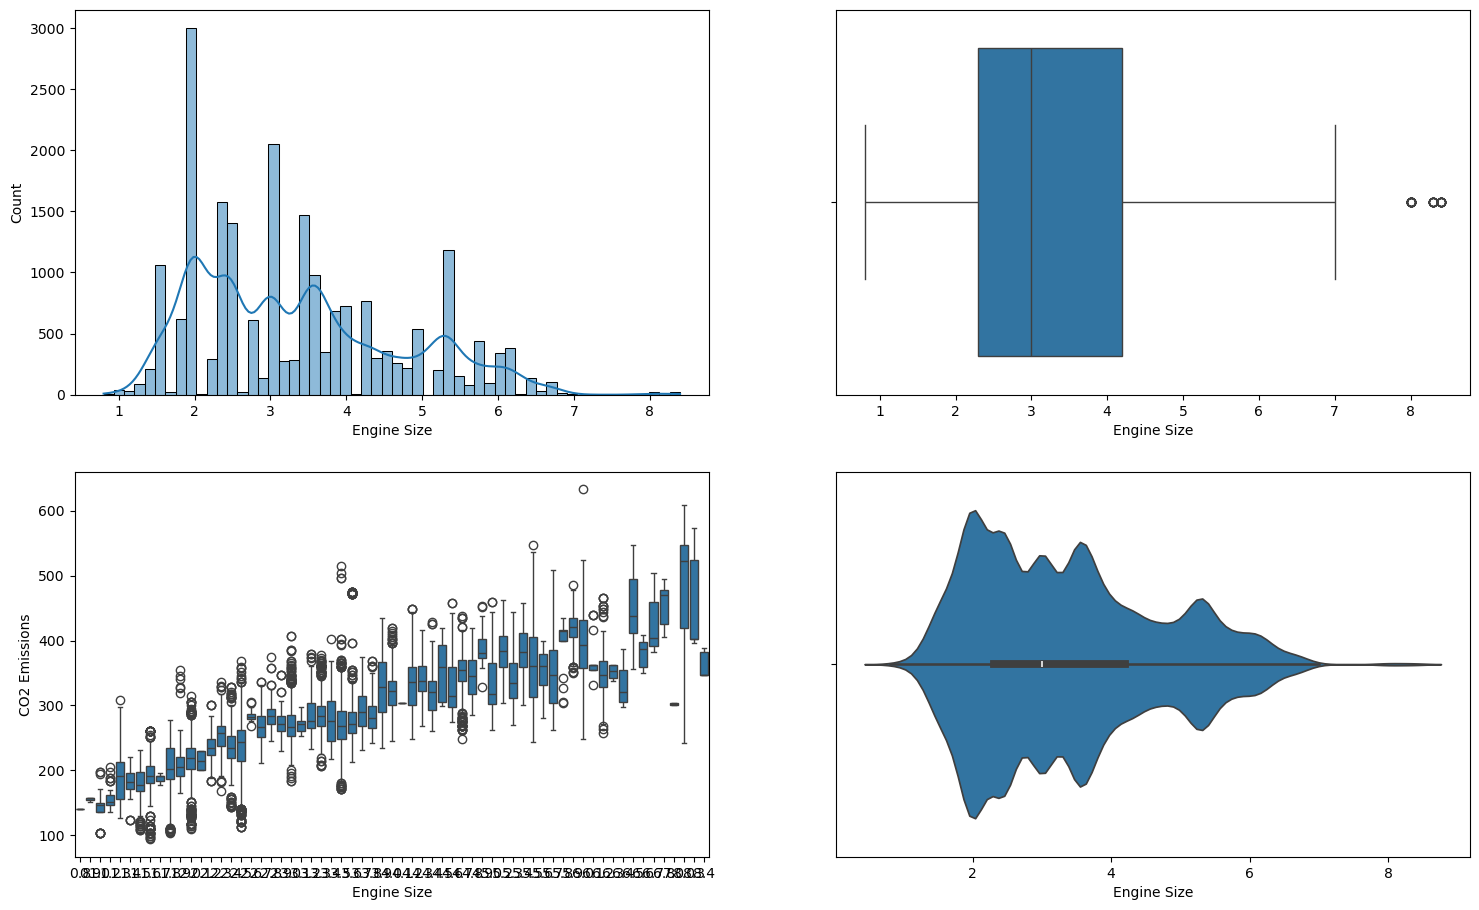

In [91]:
fig, axes = plt.subplots(2, 2, figsize = (18, 11))

sns.histplot(x = df["Engine Size"], kde = True, ax = axes[0, 0])
sns.boxplot(x = df["Engine Size"], ax = axes[0, 1])
sns.boxplot(x = df["Engine Size"], y = df["CO2 Emissions"], ax = axes[1, 0])
sns.violinplot(x = df["Engine Size"], ax = axes[1, 1])

plt.show()

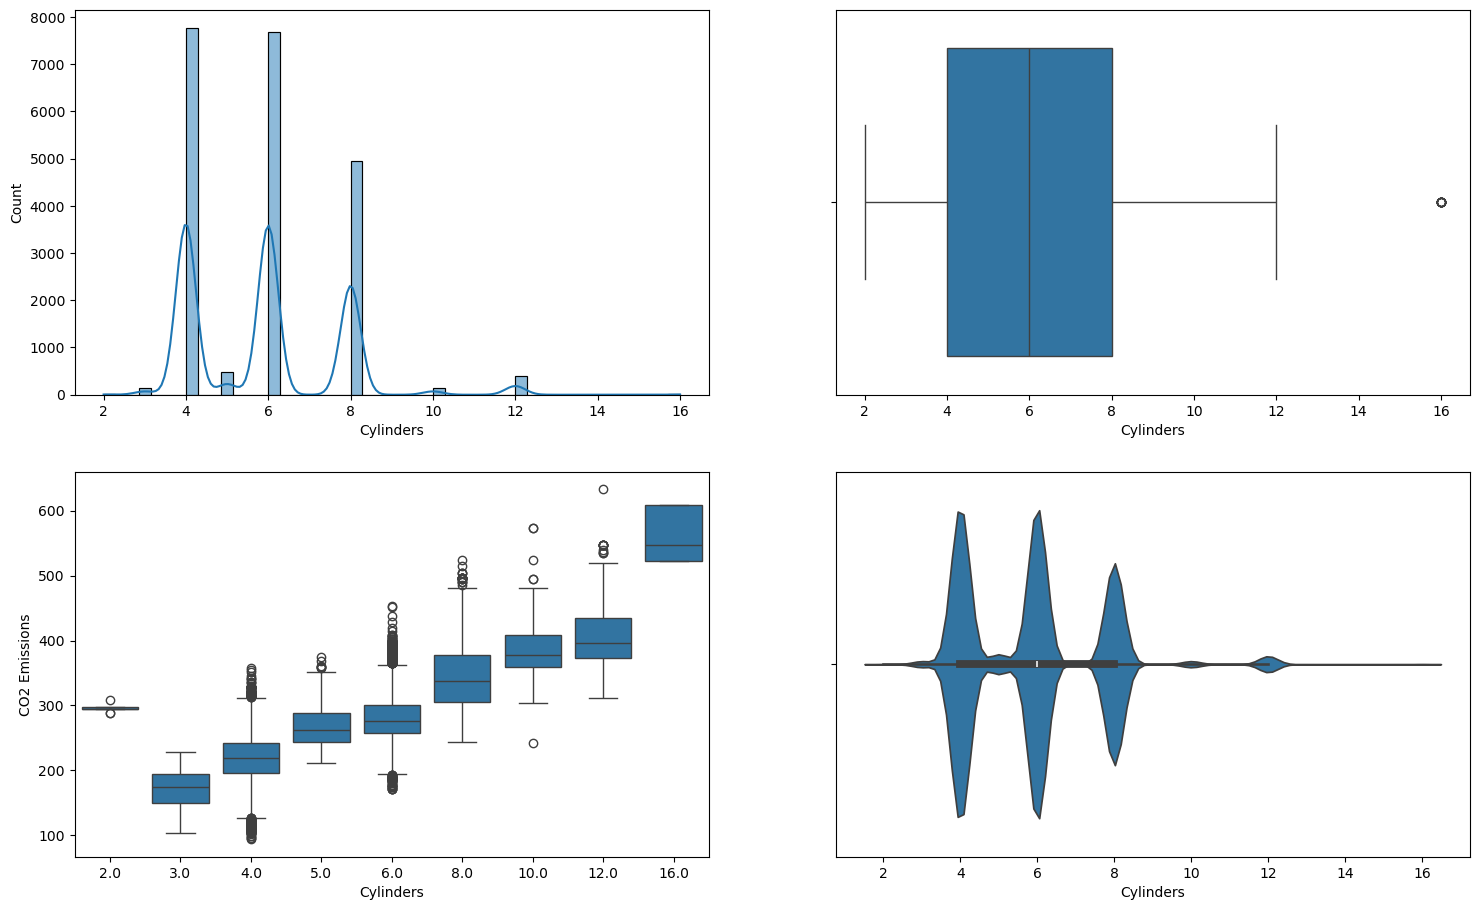

In [93]:
fig, axes = plt.subplots(2, 2, figsize = (18, 11))

sns.histplot(x = df["Cylinders"], kde = True, ax = axes[0, 0])
sns.boxplot(x = df["Cylinders"], ax = axes[0, 1])
sns.boxplot(x = df["Cylinders"], y = df["CO2 Emissions"], ax = axes[1, 0])
sns.violinplot(x = df["Cylinders"], ax = axes[1, 1])

plt.show()

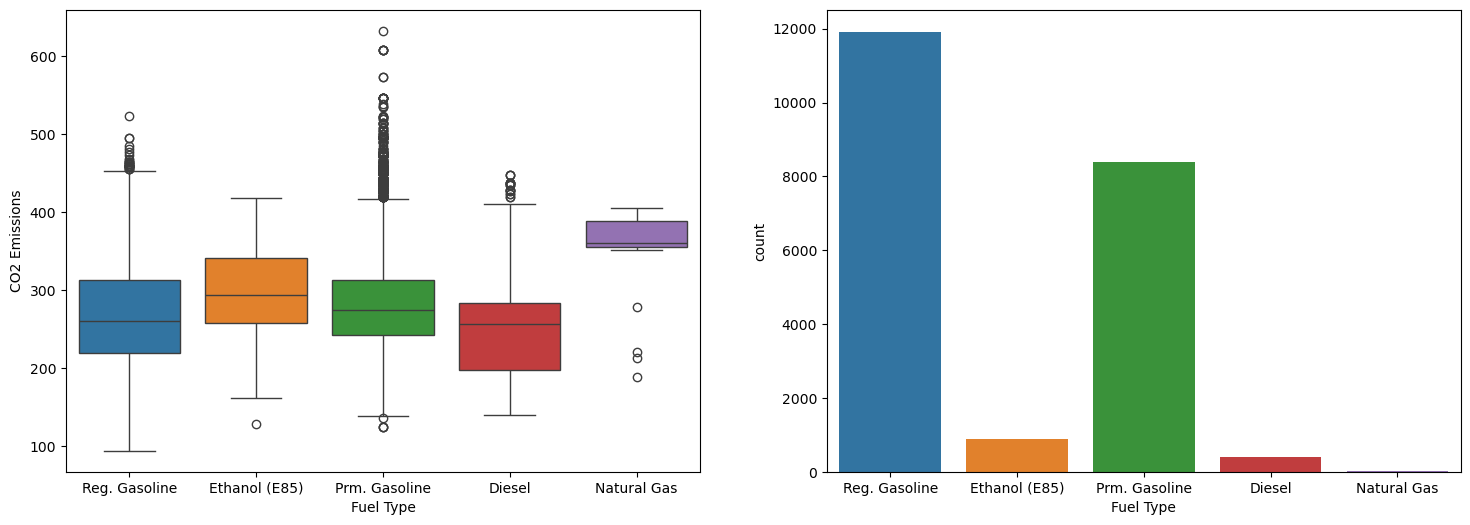

In [95]:
fig, axes = plt.subplots(1, 2, figsize = (18, 6))

sns.boxplot(x = df["Fuel Type"], y = df["CO2 Emissions"], hue = df["Fuel Type"], ax = axes[0])
sns.countplot(x = df["Fuel Type"], hue = df["Fuel Type"], ax = axes[1])

plt.show()

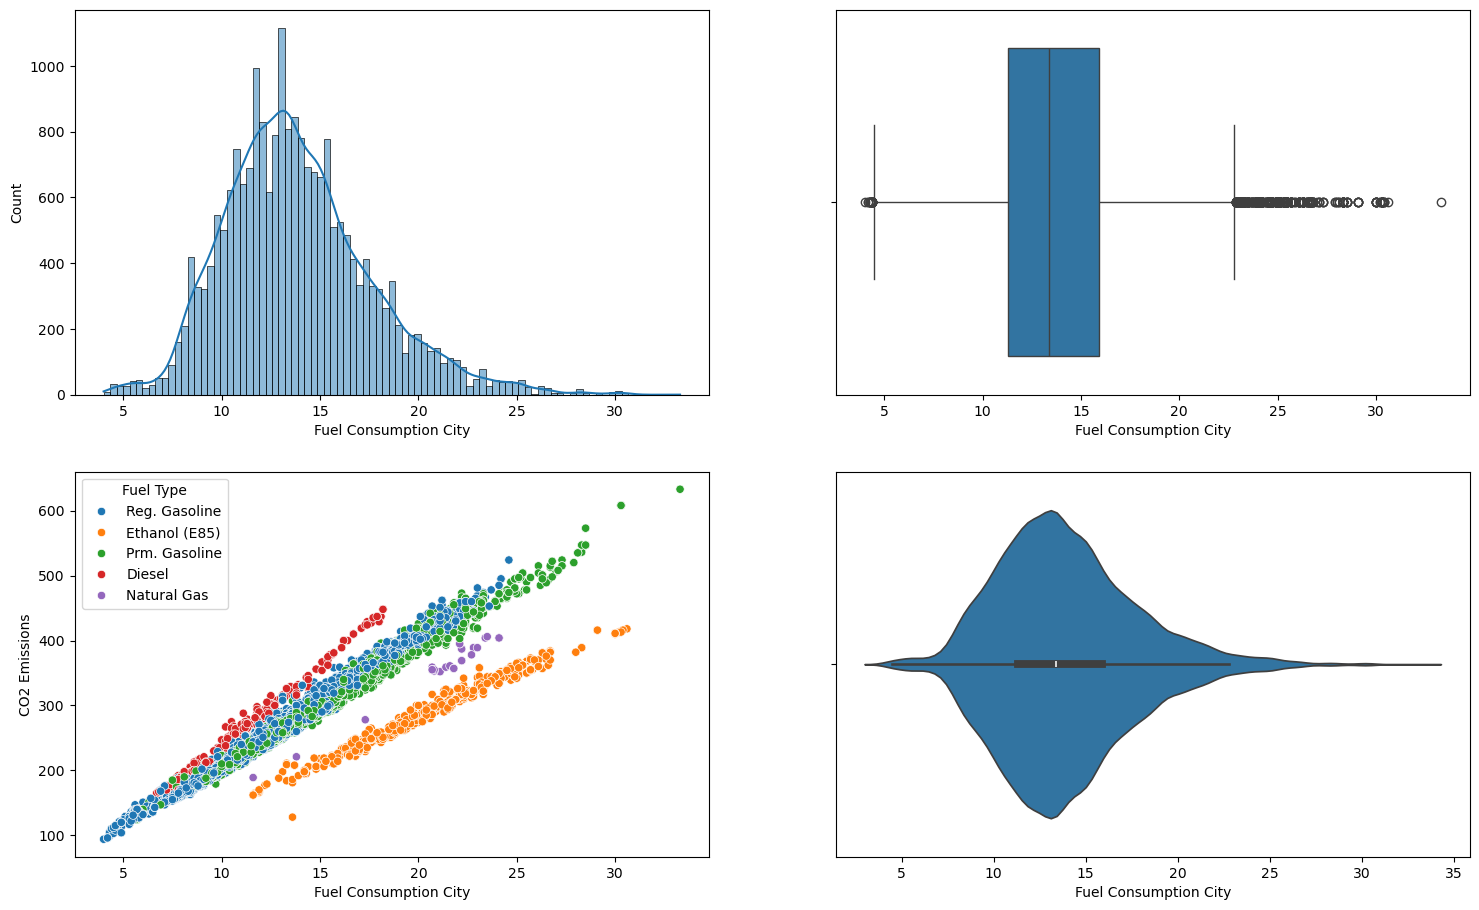

In [97]:
fig, axes = plt.subplots(2, 2, figsize = (18, 11))

sns.histplot(x = df["Fuel Consumption City"], kde = True, ax = axes[0, 0])
sns.boxplot(x = df["Fuel Consumption City"], ax = axes[0, 1])
sns.scatterplot(x = df["Fuel Consumption City"], y = df["CO2 Emissions"], ax = axes[1, 0], hue=df["Fuel Type"])
sns.violinplot(x = df["Fuel Consumption City"], ax = axes[1, 1])

plt.show()

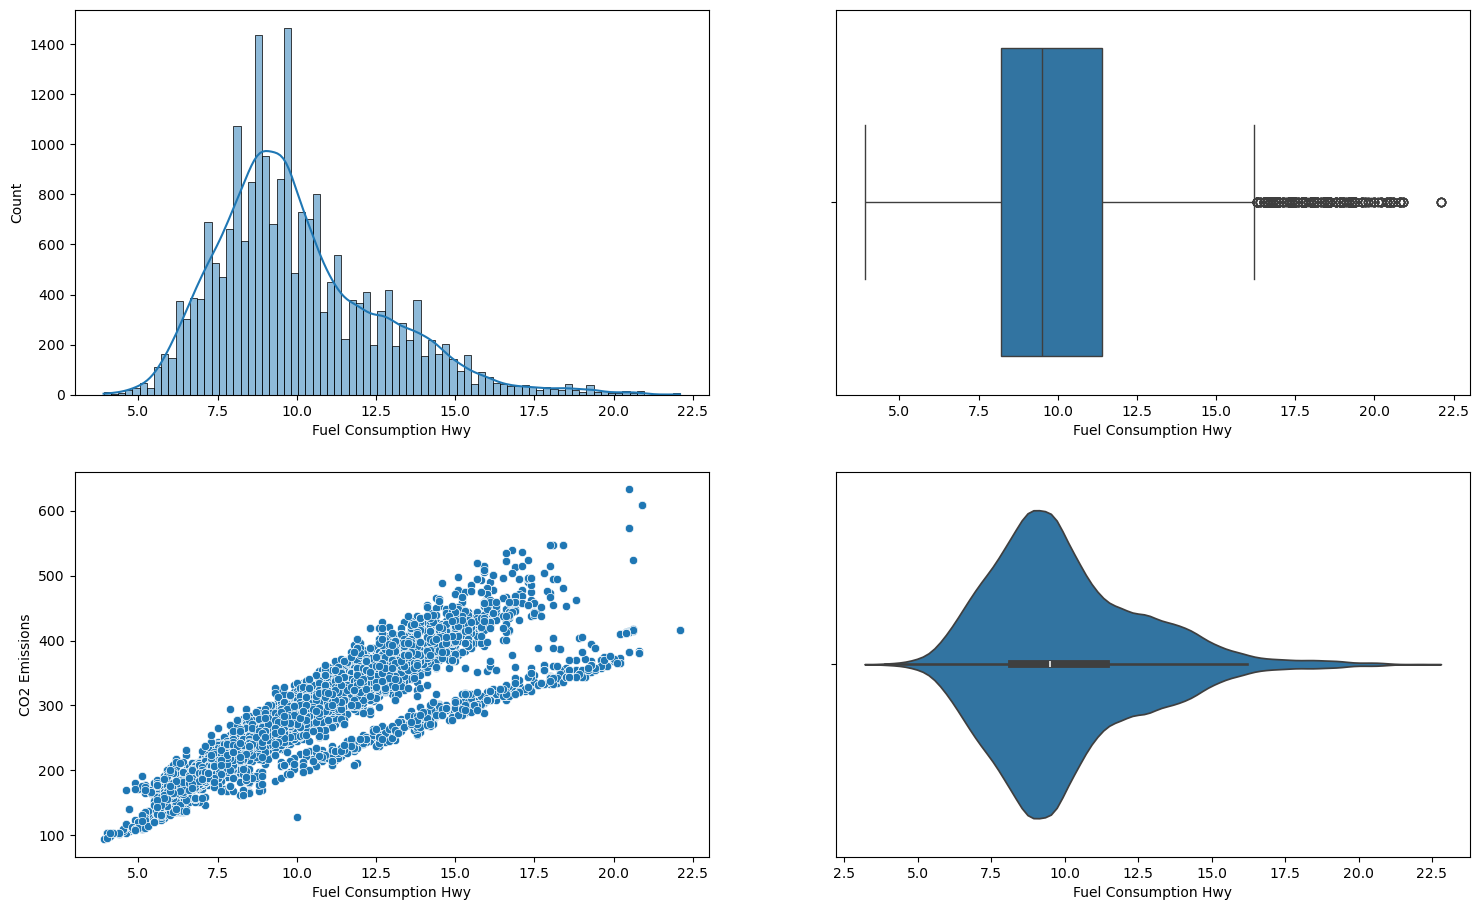

In [99]:
fig, axes = plt.subplots(2, 2, figsize = (18, 11))

sns.histplot(x = df["Fuel Consumption Hwy"], kde = True, ax = axes[0, 0])
sns.boxplot(x = df["Fuel Consumption Hwy"], ax = axes[0, 1])
sns.scatterplot(x = df["Fuel Consumption Hwy"], y = df["CO2 Emissions"], ax = axes[1, 0])
sns.violinplot(x = df["Fuel Consumption Hwy"], ax = axes[1, 1])

plt.show()

In [436]:
def calculate_outlier_percentage_iqr(df, cols, multiplier=1.5):
    """
    Calculate the percentage of outliers in specified columns using IQR method.
    
    Parameters:
    - df: pandas DataFrame
    - cols: list of numerical column names
    - multiplier: IQR multiplier (default 1.5 for mild outliers, 3.0 for extreme)
    
    Returns:
    - Dictionary with column names and their outlier percentages
    """
    outlier_info = {}
    total_rows = len(df)
    
    for col in cols:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lim_inf = Q1 - multiplier * IQR
            lim_sup = Q3 + multiplier * IQR
            
            # Identify outliers
            outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)][col]
            outlier_count = len(outliers)
            outlier_percentage = (outlier_count / total_rows) * 100
            
            outlier_info[col] = {
                'outlier_count': outlier_count,
                'outlier_percentage': round(outlier_percentage, 2),
                'lower_bound': round(lim_inf, 2),
                'upper_bound': round(lim_sup, 2)
            }
        else:
            print(f"Skipping {col}: not in DataFrame or not numeric")
    
    return outlier_info

# Example usage with your dataset
numerical_cols = ['Engine Size', 'Cylinders', 'Fuel Consumption City', 
                  'Fuel Consumption Hwy', 'Fuel Consumption Comb', 
                  'Fuel Consumption Comb (mpg)', 'CO2 Emissions']
outlier_stats = calculate_outlier_percentage_iqr(df, numerical_cols)

# Print results
print("Outlier Analysis (IQR Method):")
for col, stats in outlier_stats.items():
    print(f"{col}:")
    print(f"  Outliers: {stats['outlier_count']} ({stats['outlier_percentage']}%)")
    print(f"  IQR Bounds: [{stats['lower_bound']}, {stats['upper_bound']}]")

Outlier Analysis (IQR Method):
Engine Size:
  Outliers: 40 (0.19%)
  IQR Bounds: [-0.55, 7.05]
Cylinders:
  Outliers: 11 (0.05%)
  IQR Bounds: [-2.0, 14.0]
Fuel Consumption City:
  Outliers: 503 (2.33%)
  IQR Bounds: [4.4, 22.8]
Fuel Consumption Hwy:
  Outliers: 485 (2.25%)
  IQR Bounds: [3.4, 16.2]
Fuel Consumption Comb:
  Outliers: 457 (2.12%)
  IQR Bounds: [3.9, 19.9]
Fuel Consumption Comb (mpg):
  Outliers: 322 (1.49%)
  IQR Bounds: [6.5, 42.5]
CO2 Emissions:
  Outliers: 267 (1.24%)
  IQR Bounds: [102.5, 442.5]


In [438]:
df.isna().sum()

Model Year                     0
Make                           0
Model                          0
Vehicle Class                  0
Engine Size                    0
Cylinders                      0
Transmission                   0
Fuel Type                      0
Fuel Consumption City          0
Fuel Consumption Hwy           0
Fuel Consumption Comb          0
Fuel Consumption Comb (mpg)    0
CO2 Emissions                  0
dtype: int64

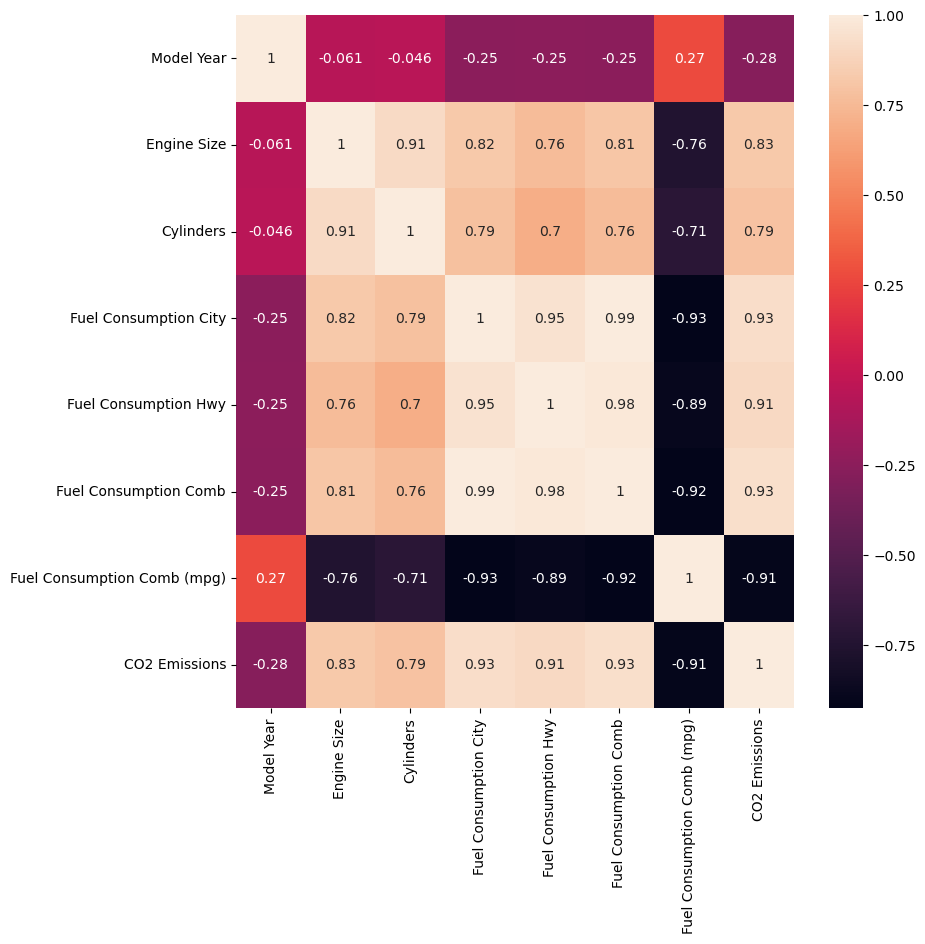

In [440]:
plt.figure(figsize = (9, 9))

sns.heatmap(data = df._get_numeric_data().corr(), annot = True)

plt.show()

### EDA Insights

- Make and Model present high cardinality.
- Fuel type is imbalanced: most vehicles are Gasoline, fewer are Diesel and Hybrid.
- No missing values.
- Fuel Consumption, Engine size, CO₂ emissions show a strong positive correlation.
- Fuel Consumption_Comp does not introduce new information.
- Some extreme values look like outliers and may need treatment.

## Cleaning

- Drop high cardinality features.
- Drop redundant features.
- Feature engineering.
- Remove outliers (every row left in the cleaned dataset is within Tukey bounds for all float columns at the same time).


### Note on Outliers
In practice, tree-based models (Random Forest, XGBoost) are more robust to outliers,
while distance/linear models (KNN, Linear Regression, RadiusNeighbors) are more sensitive.
For simplicity, we use the same outlier-cleaned dataset across all models to allow
a fair and stable comparison.

In [632]:
df.drop(["Make", "Model", "Vehicle Class", "Fuel Consumption Comb", "Fuel Consumption Comb (mpg)"], axis = 1, inplace = True)

df.head()

,Model Year,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,CO2 Emissions
0,1999,1.5,4.0,A4,Reg. Gasoline,9.3,7.0,189
1,2015,5.3,8.0,A6,Ethanol (E85),20.2,13.6,275
2,1997,1.9,4.0,M5,Prm. Gasoline,11.6,8.0,230
3,2016,3.0,6.0,AS7,Prm. Gasoline,11.5,8.1,233
4,2018,1.2,3.0,AV,Reg. Gasoline,6.9,5.7,149


In [634]:
# Transmission

transmission_list = []

for t in df["Transmission"].values:

    value_1 = True if "A" in t else False
    value_2 = True if "M" in t else False
    
    value_3 = t.strip("AMSV") if len(t.strip("AMSV")) > 0 else 0
    
    transmission_list.append([value_1, value_2, int(value_3)])
    
    
df_transmission = pd.DataFrame(data = transmission_list, columns = ["AUTOMATIC", "MANUAL", "GEARRATIO"])

df_transmission.head(3)

,AUTOMATIC,MANUAL,GEARRATIO
0,True,False,4
1,True,False,6
2,False,True,5


In [636]:
df = pd.concat([df, df_transmission], axis = 1)

In [638]:
inconsistent = df[(df["AUTOMATIC"] == True) & (df["MANUAL"] == True)]
inconsistent

,Model Year,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,CO2 Emissions,AUTOMATIC,MANUAL,GEARRATIO
41,2022,1.6,4.0,AM6,Reg. Gasoline,7.1,7.9,176,True,True,6
53,2022,2.0,4.0,AM7,Prm. Gasoline,10.3,8.1,217,True,True,7
75,2012,1.6,4.0,AM6,Reg. Gasoline,8.5,6.5,175,True,True,6
142,2022,1.6,4.0,AM7,Reg. Gasoline,8.7,6.6,184,True,True,7
145,2018,5.2,10.0,AM7,Prm. Gasoline,16.8,11.4,336,True,True,7
...,...,...,...,...,...,...,...,...,...,...,...
21495,2018,3.0,6.0,AM7,Prm. Gasoline,13.5,9.9,280,True,True,7
21554,2015,4.2,8.0,AM7,Prm. Gasoline,17.3,10.4,327,True,True,7
21556,2020,3.0,6.0,AM8,Prm. Gasoline,13.1,9.8,273,True,True,8
21567,2015,2.0,4.0,AM6,Prm. Gasoline,9.5,7.2,196,True,True,6


In [640]:
def unify_transmission(row):
    # If both True → use the Transmission label
    if row["AUTOMATIC"] and row["MANUAL"]:
        return row["Transmission"]   # keep "AM7", "AM6", etc.
    elif row["AUTOMATIC"]:
        return "Automatic"
    else:
        return "Manual"

df["Transmission_clean"] = df.apply(unify_transmission, axis=1)

In [642]:
df["Transmission_clean"] = df["Transmission_clean"].replace(
    {"AM5": "Automated Manual", 
     "AM6": "Automated Manual",
     "AM7": "Automated Manual",
     "AM8": "Automated Manual",
     "AM9": "Automated Manual"}
)

In [644]:
df = df.drop(['Transmission', 'AUTOMATIC', 'MANUAL'], axis=1)

In [646]:
df['Transmission_clean'].value_counts()

Transmission_clean
Automatic           15796
Manual               4873
Automated Manual      929
Name: count, dtype: int64

In [648]:
def tukey_float_individual(df):
    df_trat = df.copy()
    for col in df.select_dtypes(include="float64"):
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        df_trat = df_trat[(df_trat[col] >= lim_inf) & (df_trat[col] <= lim_sup)]
    return df_trat

In [650]:
df_clean = tukey_float(df)

## Endoding and Scaling for distance-based models and tree-abased models.

Dataset distance (with pd.get_dummies + scaling):
  - For Linear Regression, KNN, RadiusNeighbors, SVM.
  - Ensures categorical variables are encoded properly for distance/linear assumptions.


Dataset trees (with LabelEncoder, no scaling required):
  - For DecisionTree, RandomForest, XGBoost.
  - Compact, efficient, no artificial feature inflation.

In [654]:
def preprocess_linear_distance(df):
    # one-hot encode + scale
    df = pd.get_dummies(df, columns=["Fuel Type", "Transmission_clean"], drop_first=True)
    X = df.drop("CO2 Emissions", axis=1)
    y = df["CO2 Emissions"]
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return train_test_split(X, y, test_size=0.2, random_state=43)

def preprocess_trees(df):
    # label encode, no scaling
    df = df.copy()
    for col in ["Fuel Type", "Transmission_clean"]:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    X = df.drop("CO2 Emissions", axis=1)
    y = df["CO2 Emissions"]
    return train_test_split(X, y, test_size=0.2, random_state=43)

In [656]:
# Unpack train/test splits from your preprocessing functions
X_train_dist, X_test_dist, y_train_dist, y_test_dist = preprocess_linear_distance(df_clean)
X_train_tree, X_test_tree, y_train_tree, y_test_tree = preprocess_trees(df_clean)

## Model

- The model with the lowest Mean Absolute Error (MAE) is selected as best_model.

### Notes on MAE
- Selecting the model with the lowest MAE ensures that predictions are, on average, as close as possible to the true values.

- However, a model optimized for MAE can still overfit, meaning it may make occasional large errors (reflected in a higher MSE).

- In our case, interpretability is paramount, so we prioritize the lowest MAE even if it slightly compromises generalization.

In [674]:
models_distance = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=7), 
    RadiusNeighborsRegressor(radius=np.sqrt(X_train.shape[1])/8), # r = un octavo de la máxima distancia posible entre dos puntos
]

models_trees = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor()    
]

metrics = []

for model in models_distance:

    model.fit(X_train_dist, y_train_dist)
    y_pred = model.predict(X_test_dist)

    mae = mean_absolute_error(y_test_dist, y_pred)
    mse = mean_squared_error(y_test_dist, y_pred)
    r2 = r2_score(y_test_dist, y_pred)*100

    results = {
        "model" : model,
        "model_str" : str(model),
        "mae" : mae,
        "mse" : mse,
        "r2" : r2
    }

    metrics.append(results)

for model in models_trees:

    model.fit(X_train_tree, y_train_tree)
    y_pred = model.predict(X_test_tree)

    mae = mean_absolute_error(y_test_tree, y_pred)
    mse = mean_squared_error(y_test_tree, y_pred)
    r2 = r2_score(y_test_tree, y_pred)

    results = {
        "model" : model,
        "model_str" : str(model),
        "mae" : mae,
        "mse" : mse,
        "r2" : r2
    }

    metrics.append(results)

C:\Users\User\anaconda3\Lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


In [676]:
df_metrics = pd.DataFrame(metrics)

In [678]:
df_metrics

,model,model_str,mae,mse,r2
0,LinearRegression(),LinearRegression(),1.860960e+00,1.222760e+01,9.967044e+01
1,KNeighborsRegressor(n_neighbors=7),KNeighborsRegressor(n_neighbors=7),3.555866e+00,3.180391e+01,9.914282e+01
2,RadiusNeighborsRegressor(radius=0.433012701892...,RadiusNeighborsRegressor(radius=0.433012701892...,2.203386e+15,2.032264e+34,-5.477344e+32
3,DecisionTreeRegressor(),DecisionTreeRegressor(),6.003743e-01,6.592707e+00,9.982231e-01
4,"(DecisionTreeRegressor(max_features=1.0, rando...",RandomForestRegressor(),6.095392e-01,3.402086e+00,9.990831e-01
5,"XGBRegressor(base_score=None, booster=None, ca...","XGBRegressor(base_score=None, booster=None, ca...",9.323456e-01,3.175864e+00,9.991440e-01


In [664]:
best_model = df_metrics.sort_values("mae").iloc[0, 0]

In [666]:
best_model

DecisionTreeRegressor()

### Model Performance Summary
- Decision Tree achieved the lowest MAE among all models.
- Linear Regression underperformed due to non-linear relationships.
- Decision Trees showed high variance (overfitting).
- Best model: **Decision Tree (MAE = 0.59, R² = 0.99)**.

## Cross - Validation

- Machine learning technique to assess a model's performance and generalization ability on unseen data.
- Hold-Out splits data into a single train-test set (e.g., 80/20) to evaluate performance, while K-Fold CV divides data into K folds (e.g., 7), training and testing iteratively to provide robust metrics (R² ≈ 0.998, MAE ≈ 0.59) and assess generalization across varied subsets.
- Hold-Out reveals overfitting if test metrics (e.g., R² < 0.9) are much worse than training; K-Fold CV confirms this with high variance in R² across folds or a gap between training (e.g., R² ≈ 1.0) and test performance, indicating the Decision Tree memorizes noise rather than general patterns.

In [687]:
#Multiple hold out validation: 500 iterations

def preprocess_tree(df):
    # label encode, no scaling
    df = df.copy()
    for col in ["Fuel Type", "Transmission_clean"]:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    X = df.drop("CO2 Emissions", axis=1)
    y = df["CO2 Emissions"]
    return X, y

#The original preprocess_linear_distance function returned a list of NumPy arraws from train_test_split.
#The new preprocess_linear_distance we separated preprocessing from spliting, so the function is reusable and doesn't lock us into one validation strategy.

In [713]:
X, y = preprocess_tree(df_clean)

lista_mae = []
lista_mse = []
lista_r2 = []

for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
    
    model = best_model
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    
    lista_mae.append(mean_absolute_error(y_test, yhat))
    lista_mse.append(mean_squared_error(y_test, yhat))
    lista_r2.append(r2_score(y_test, yhat))

0.6767398789616181
0.04196543628357236


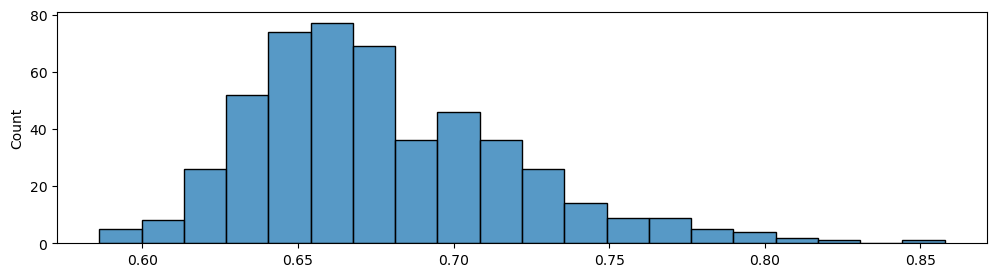

In [715]:
print(np.mean(lista_mae))
print(np.std(lista_mae))

plt.figure(figsize=(12,3))

sns.histplot(lista_mae, bins=20)

plt.show()

8.326699570083699
4.597645624182271


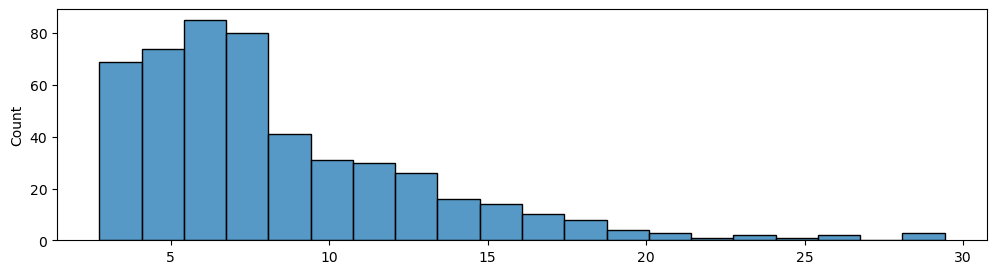

In [717]:
print(np.mean(lista_mse))
print(np.std(lista_mse))

plt.figure(figsize=(12,3))

sns.histplot(lista_mse, bins=20)

plt.show()

0.9977837170524898
0.0012175648919541923


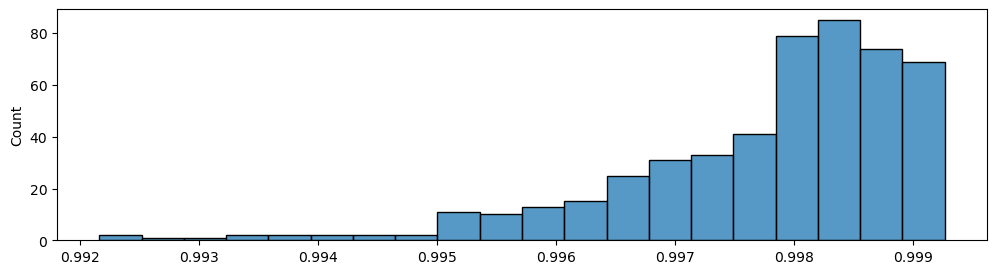

In [719]:
print(np.mean(lista_r2))
print(np.std(lista_r2))

plt.figure(figsize=(12,3))

sns.histplot(lista_r2, bins=20)

plt.show()

In [707]:
#K-Fold Validation

kfold = KFold(n_splits = 7, shuffle=True, random_state=42)
yhat = []
ytrue = []

for train_index, test_index in kfold.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 

    model = clone(best_model) #If you don't reinitialize the model each fold, the model will keep learning across folds which breaks the idea of cross-validation
    model.fit(X_train, y_train)
    yhat_fold = model.predict(X_test)
    yhat.extend(yhat_fold)
    ytrue.extend(y_test) #By saving y_test we can compare predictions with the true values.

In [709]:
print("mae:", mean_absolute_error(ytrue, yhat))
print("mse:", mean_squared_error(ytrue, yhat))
print("r2:", r2_score(ytrue, yhat))

mae: 0.5891354898306974
mse: 6.73579298527827
r2: 0.9982078080828852


In [ ]:
print("mae:", mean_absolute_error(y, yhat))
print("mse:", mean_squared_error(y, yhat))
print("r2:", r2_score(y, yhat))

### Validation Results
- Hold-out and K-Fold produced consistent results → good generalization.
- Confirms Decision Tree is the most interpretable and robust model for this dataset.

## Save model

In [728]:
with open("best_model_exercise_II.pkl", "bw") as file:
    pickle.dump(best_model, file)